### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np
m = np.arange(12).reshape((3,4))
print(m,'\n')
print('overall means = ',np.mean(m),'\n')
n_r,n_c=m.shape

for r in range(n_r):
    print('Mean of row ',r,' = ',np.mean(m[r,:]),'\n')
    
for c in range(n_c):
    print('Mean of column ',c,' = ',np.mean(m[:,c]),'\n')

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

overall means =  5.5 

Mean of row  0  =  1.5 

Mean of row  1  =  5.5 

Mean of row  2  =  9.5 

Mean of column  0  =  4.0 

Mean of column  1  =  5.0 

Mean of column  2  =  6.0 

Mean of column  3  =  7.0 



2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
u = np.array([1,3,5,7])
v = np.array([2,4,6])

def out1(a,b):
    m=np.zeros((len(a),len(b)))
    for i in range(len(a)):
        for j in range(len(b)):
            m[i,j]=a[i]*b[j] 
    return m
def out2(a,b):
    m=np.zeros((len(a),len(b)))
    for i in range(len(a)):
        m[i,:]=a[i]*b
    return m

In [3]:
print(u,'\n',v,'\n')
print(np.outer(u,v),'\n')
print(out1(u,v),'\n')
print(out2(u,v),'\n')


[1 3 5 7] 
 [2 4 6] 

[[ 2  4  6]
 [ 6 12 18]
 [10 20 30]
 [14 28 42]] 

[[ 2.  4.  6.]
 [ 6. 12. 18.]
 [10. 20. 30.]
 [14. 28. 42.]] 

[[ 2.  4.  6.]
 [ 6. 12. 18.]
 [10. 20. 30.]
 [14. 28. 42.]] 



3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [4]:
m=np.random.random((10,6))
print('Before ',m)
m[m<0.1]=0
print('After ',m)

Before  [[0.29049564 0.58822145 0.94689558 0.24068452 0.57092424 0.78046498]
 [0.66833511 0.38162448 0.88667367 0.91413579 0.40663924 0.57536663]
 [0.96991968 0.657847   0.29102356 0.58812207 0.05564467 0.67143523]
 [0.28788265 0.72235744 0.52113669 0.80796004 0.2777777  0.8768002 ]
 [0.79592609 0.29134874 0.96872168 0.09100338 0.43925416 0.47985282]
 [0.66306104 0.24012867 0.06026566 0.20994176 0.57645875 0.63426384]
 [0.02962283 0.66867906 0.50739574 0.26366378 0.9849984  0.89718761]
 [0.40338379 0.36979113 0.79007868 0.26538881 0.33609615 0.06901046]
 [0.40385236 0.0660834  0.3069695  0.87478352 0.86991359 0.52095624]
 [0.80271676 0.76719671 0.24376108 0.08879397 0.84227982 0.73494253]]
After  [[0.29049564 0.58822145 0.94689558 0.24068452 0.57092424 0.78046498]
 [0.66833511 0.38162448 0.88667367 0.91413579 0.40663924 0.57536663]
 [0.96991968 0.657847   0.29102356 0.58812207 0.         0.67143523]
 [0.28788265 0.72235744 0.52113669 0.80796004 0.2777777  0.8768002 ]
 [0.79592609 0.291

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

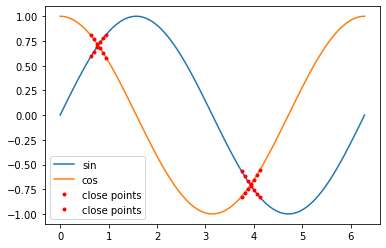

In [5]:
from math import pi
import matplotlib.pyplot as plt # everybody imports it that way

#0
a=np.linspace(0,2*pi,100)
print(a,'\n')
#1
print(a[::10],'\n')
#2
print(a[::-1],'\n')
#3
print(a[abs(np.cos(a)-np.sin(a))<0.1],'\n')
#4
plt.plot(a,np.sin(a),label='sin')
plt.plot(a,np.cos(a),label='cos')

b=a[abs(np.cos(a)-np.sin(a))<0.3]
plt.plot(b,np.cos(b),'.r',label='close points')
plt.plot(b,np.sin(b),'.r',label='close points')

plt.legend()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [6]:
m=np.transpose([i*j for i in range(1,11) for j in range(1,11)])
m=m.reshape((10,10))
print(m,'\n')
#trace
print(np.trace(m),'\n')
#anto-diagonal
print(np.fliplr(m).diagonal(),'\n')
#digonal offset
print(np.diagonal(m[:,1:]),'\n')




[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]] 

385 

[10 18 24 28 30 30 28 24 18 10] 

[ 2  6 12 20 30 42 56 72 90] 



6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [7]:
dist=[0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448]
print(dist)
grid=np.zeros((len(dist),len(dist)))
for i in range(len(dist)):
    grid[i,:]+=dist-np.full(len(dist),dist[i])

grid=abs(grid)
print('GRID MILES: \n',grid)
print('GRID KM: \n',grid*1.61)

[0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448]
GRID MILES: 
 [[   0.  198.  303.  736.  871. 1175. 1475. 1544. 1913. 2448.]
 [ 198.    0.  105.  538.  673.  977. 1277. 1346. 1715. 2250.]
 [ 303.  105.    0.  433.  568.  872. 1172. 1241. 1610. 2145.]
 [ 736.  538.  433.    0.  135.  439.  739.  808. 1177. 1712.]
 [ 871.  673.  568.  135.    0.  304.  604.  673. 1042. 1577.]
 [1175.  977.  872.  439.  304.    0.  300.  369.  738. 1273.]
 [1475. 1277. 1172.  739.  604.  300.    0.   69.  438.  973.]
 [1544. 1346. 1241.  808.  673.  369.   69.    0.  369.  904.]
 [1913. 1715. 1610. 1177. 1042.  738.  438.  369.    0.  535.]
 [2448. 2250. 2145. 1712. 1577. 1273.  973.  904.  535.    0.]]
GRID KM: 
 [[   0.    318.78  487.83 1184.96 1402.31 1891.75 2374.75 2485.84 3079.93
  3941.28]
 [ 318.78    0.    169.05  866.18 1083.53 1572.97 2055.97 2167.06 2761.15
  3622.5 ]
 [ 487.83  169.05    0.    697.13  914.48 1403.92 1886.92 1998.01 2592.1
  3453.45]
 [1184.96  866.18  697.13    0.    2

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [8]:
def prime(N=100):
    prime=[]
    v=np.array(range(N))
    v=v[v!=1]
    v=v[v!=0]
    while len(v):
        n=v[0]
        prime.append(n)
        v=v[v%n!=0]

    return np.transpose(prime)

%timeit prime(100)
%timeit prime(200)
%timeit prime(300)
%timeit prime(1000)

140 µs ± 7.63 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
225 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
315 µs ± 16.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.11 ms ± 76.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

[[-1 -1 -1 ...  1  1 -1]
 [ 1  1 -1 ...  1  1 -1]
 [-1 -1 -1 ...  1  1 -1]
 ...
 [ 1 -1 -1 ... -1 -1  1]
 [-1 -1 -1 ... -1 -1 -1]
 [ 1 -1 -1 ... -1 -1 -1]] 



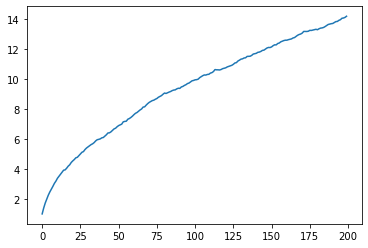

In [9]:
steps=200
walkers=1000
w=np.random.randint(2, size=(steps,walkers))
#w=np.random.randint(2, size=(5,2))
w[w==0]=-1
print(w,'\n')

r,c=np.shape(w)
for i in range(r):
    for j in range(i+1,r):
        w[r-i-1]+=w[r-j-1]
        
w=w**2
d=np.array([np.mean(r) for r in w])

plt.plot(d**0.5)

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [10]:
!cat popu*

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


In [11]:
data=np.loadtxt('populations.txt')

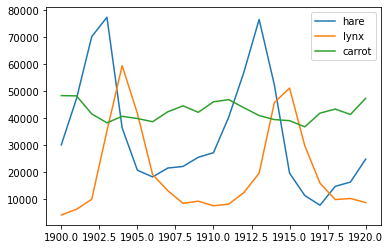

In [23]:
y=data[:,0]
hare=data[:,1]
lynx=data[:,2]
carrot=data[:,3]
plt.plot(y,hare,label='hare')
plt.plot(y,lynx,label='lynx')
plt.plot(y,carrot,label='carrot')
plt.legend()

In [26]:
#lynx and hare
print('lynx and hare')

m_l=np.mean(lynx)
m_h=np.mean(hare)

print('Mean of lynx',m_l)
print('St.Dev. of lynx',np.std(lynx))
print('Mean of hare',m_h)
print('St.Dev. of hare',np.std(hare))

corr=sum((hare-m_h)*(lynx-m_l))
corr/=(sum((hare-m_h)**2*(lynx-m_l)**2))**0.5

print('Correlation',corr)


lynx and hare
Mean of lynx 20166.666666666668
St.Dev. of lynx 16254.591536908763
Mean of hare 34080.95238095238
St.Dev. of hare 20897.906458089667
Correlation 0.44195846696877467


In [31]:
for d in range(len(y)):
    dic={}
    l=lynx[d]
    c=carrot[d]
    h=hare[d]
    
    dic[l]='lynx'
    dic[c]='carrot'
    dic[h]='hare'
    
    print('Max of year',int(y[d]),'is',dic[max(l,c,h)])

Max of year 1900 is carrot
Max of year 1901 is carrot
Max of year 1902 is hare
Max of year 1903 is hare
Max of year 1904 is lynx
Max of year 1905 is lynx
Max of year 1906 is carrot
Max of year 1907 is carrot
Max of year 1908 is carrot
Max of year 1909 is carrot
Max of year 1910 is carrot
Max of year 1911 is carrot
Max of year 1912 is hare
Max of year 1913 is hare
Max of year 1914 is hare
Max of year 1915 is lynx
Max of year 1916 is carrot
Max of year 1917 is carrot
Max of year 1918 is carrot
Max of year 1919 is carrot
Max of year 1920 is carrot
